# Principal Component Analysis (PCA) 
# for sport performances visualisation


<div>
<img src="./logo.jpg" width="250">
</div>



### *Presented by Adrien BENAMIRA - PhD candidate student at SPMS - NTU*


#### Code project





In [1]:
#imports
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [26]:
def myPCA(df, clusters=None):
    # Normalize data
    df_norm = (df - df.mean()) / df.std()
    # PCA
    pca = PCA(n_components='mle')
    pca_res = pca.fit_transform(df_norm.values)
    ebouli = pd.Series(pca.explained_variance_ratio_)
    coef = np.transpose(pca.components_)
    cols = ['PC-'+str(x) for x in range(len(ebouli))]
    pc_infos = pd.DataFrame(coef, columns=cols, index=df_norm.columns)
    ax2 = circleOfCorrelations(pc_infos, ebouli)
    dat = pd.DataFrame(pca_res, columns=cols)
    ax2.scatter(dat["PC-0"],dat["PC-1"])
    for i, row in dat.iterrows():
        ax2.annotate(df_origin[["Athlets"]].values[i][0], xy=(dat["PC-0"].values[i],dat["PC-1"].values[i]), fontsize = 15)
    ax2.set(xlabel="Basis 1", ylabel="Basis 2")
    ax2.set_title('PCA', fontsize = 20)
    ax2.grid(True, which='both')
    ax2.axhline(y=0, color='k')
    ax2.axvline(x=0, color='k')
    plt.show()

In [27]:
def circleOfCorrelations(pc_infos, ebouli):
    plt.Circle((0,0),radius=10, color='g', fill=False)
    circle1=plt.Circle((0,0),radius=1, color='g', fill=False)
    (fig, ax) = plt.subplots(1,2,figsize=(24, 12))
    fig = plt.gcf()
    fig.suptitle('Results of the PCA for the 10-D decathlon dataset', fontsize = 20)
    fig.gca().add_artist(circle1)
    for idx in range(len(pc_infos["PC-0"])):
        x = pc_infos["PC-0"][idx]
        y = pc_infos["PC-1"][idx]
        ax[1].plot([0.0,x],[0.0,y],'k-')
        ax[1].plot(x, y, 'rx')
        ax[1].annotate(pc_infos.index[idx], xy=(x,y), fontsize = 20)
    ax[1].axhline(y=0, color='k')
    ax[1].axvline(x=0, color='k')
    plt.xlabel("Base 1 (%s%%)" % str(ebouli[0])[:4].lstrip("0."), fontsize = 20)
    plt.ylabel("Base 2 (%s%%)" % str(ebouli[1])[:4].lstrip("0."), fontsize = 20)
    plt.xlim((-1,1))
    plt.ylim((-1,1))
    plt.title("Circle of Correlations", fontsize = 20)
    return ax[0]

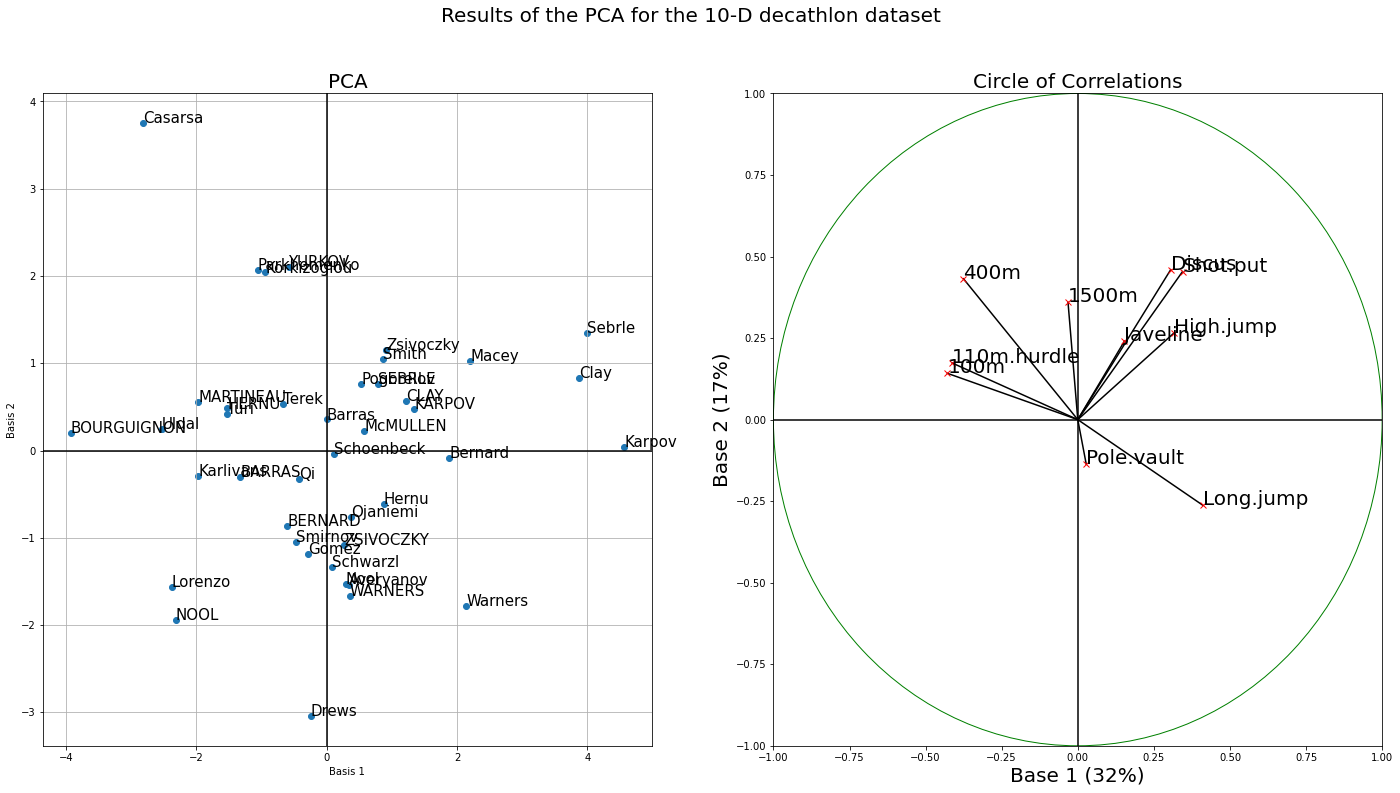

In [28]:
df_origin = pd.read_csv("csv")
df_origin.columns
myPCA(df_origin[['100m', 'Long.jump', 'Shot.put', 'High.jump', '400m',
       '110m.hurdle', 'Discus', 'Pole.vault', 'Javeline', '1500m']])